**1. Which month has the most**<br> 
-x axis: month<br> 
-y axis: kills/injuries<br> 
-Plot type: stacked bars<br> 
<br> 
**2. Working day or weekend**<br> 
-x axis: weekdays, weekend<br> 
-y axis: kills/injuries<br> 
-Plot type: Pie

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('modified_PakistanSuicideAttacks_raw.csv')

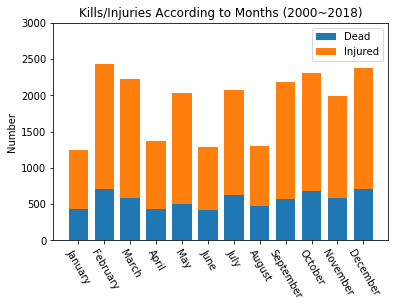

In [2]:
# 1 Which month has the most
'''
by TSun
N: int, months
kill: list of int
injur: list of int
'''
# Numeric datset
data.Kills = pd.to_numeric(data.Kills.replace('Missing', '0'))
data.Injures = pd.to_numeric(data.Injures.replace('Missing', '0'))
grp = data[['Month','Kills','Injures']].groupby('Month')

# Create plot data
N = 12 # 12 months
kill = [grp.get_group(k).Kills.sum() for k in range(1,13)]
injur = [grp.get_group(k).Injures.sum() for k in range(1,13)]
ind = np.arange(N)    # the x locations for the groups
width = 0.75       # the width of the bars

# Plot stacked bar
p1 = plt.bar(ind, kill, width)
p2 = plt.bar(ind, injur, width, bottom=kill)
plt.ylabel('Number')
plt.title('Kills/Injuries According to Months (2000~2018)')
plt.xticks(ind, ('January','February','March','April','May','June','July','August','September','October','November','December'))
plt.xticks(rotation=-60)
plt.yticks(np.arange(0,3001,500))
plt.legend((p1[0], p2[0]), ('Dead', 'Injured'))
# plt.savefig('ff.png',dpi=300,bbox_inches='tight')
plt.show()

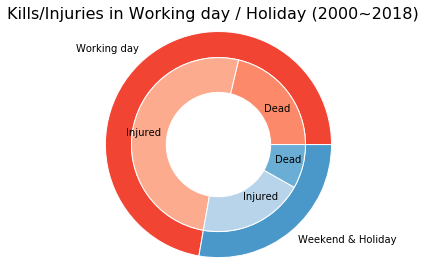

In [3]:
# 2 Working day or weekend
'''
by TSun
work: list of int
holi: list of int
'''
# Numeric datset
data.Kills = pd.to_numeric(data.Kills.replace('Missing', '0'))
data.Injures = pd.to_numeric(data.Injures.replace('Missing', '0'))
grp = data[['Daytype','Kills','Injures']].groupby('Daytype')
work = [grp.get_group('Working Day').Kills.sum(), grp.get_group('Working Day').Injures.sum()]
holi = [grp.get_group('Weekend or Holiday').Kills.sum(), grp.get_group('Weekend or Holiday').Injures.sum()]

# Create plot data
group_names=['Working day', 'Weekend & Holiday']
group_size=[sum(work), sum(holi)]
subgroup_names=[ 'Dead', 'Injured','Injured','Dead']
subgroup_size=[work[0],work[1],holi[1],holi[0]]

# Plot multi-layer donut
# Set colors
a, b = [plt.cm.Reds, plt.cm.Blues]
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.67, colors=[a(0.4), a(0.3), b(0.3), b(0.5)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
# Finish ploting
plt.suptitle('Kills/Injuries in Working day / Holiday (2000~2018)',fontsize=16)
# plt.savefig('ff.png',dpi=300,bbox_inches='tight')
plt.show()